In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Flatten

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
ds_train, train_info = tfds.load('rock_paper_scissors', split='train', with_info=True)
fig = tfds.show_examples(ds_train, train_info)

2023-03-29 23:38:42.833307: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-29 23:38:42.855326: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [4]:
ds_test,test_info= tfds.load(name='rock_paper_scissors', split='test', with_info=True)

2023-03-29 23:38:43.196321: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


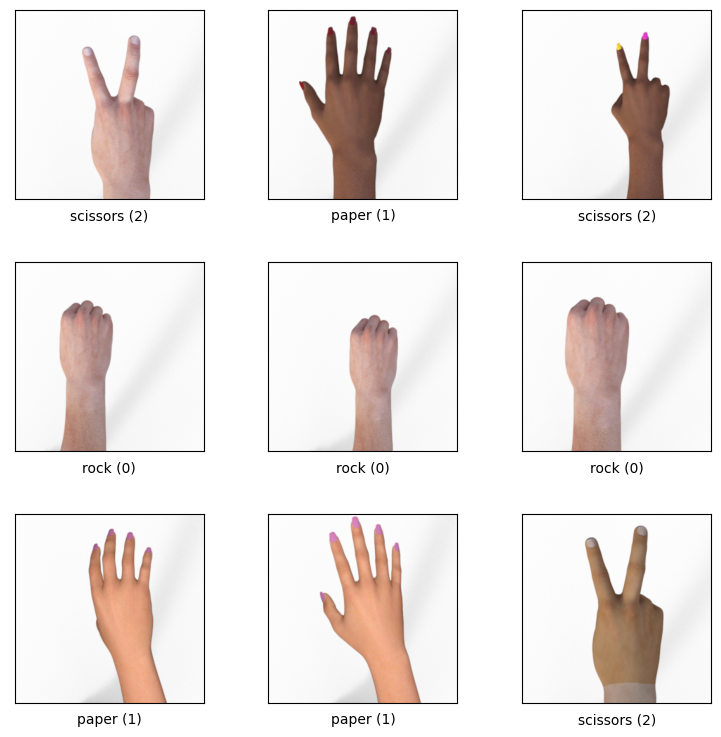

In [5]:
fig = tfds.show_examples(ds_test, test_info)

In [6]:
train_images = np.array([example['image'].numpy() for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy() for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])

In [7]:
train_images= train_images/255
test_images= test_images/255

In [8]:
test_images.shape

(372, 300, 300, 3)

In [12]:
cnn = models.Sequential([
    layers.Dropout(0.2, input_shape=(300,300,3)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)), 
    #layers.Dropout(0.35),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #layers.Dropout(0.5),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [13]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
cnn.fit(train_images,train_labels, validation_data=(test_images,test_labels), epochs=10)

Epoch 1/10
79/79 [==============================] - 239s 3s/step - loss: 1.0481 - accuracy: 0.4524 - val_loss: 1.0117 - val_accuracy: 0.4382
Epoch 2/10
79/79 [==============================] - 232s 3s/step - loss: 0.2034 - accuracy: 0.9274 - val_loss: 0.6180 - val_accuracy: 0.7554
Epoch 3/10
79/79 [==============================] - 233s 3s/step - loss: 0.0435 - accuracy: 0.9885 - val_loss: 0.5819 - val_accuracy: 0.8226
Epoch 4/10


KeyboardInterrupt: 

In [15]:
results = cnn.evaluate(test_images,test_labels)

12/12 [==============================] - 9s 714ms/step - loss: 0.5320 - accuracy: 0.8280


In [16]:
print("accuracy =",results[1])

accuracy = 0.8279569745063782
